In [89]:
%matplotlib inline
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import collections
import itertools
import sys
import math

1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [20]:
roulette = {0:'green',1:'red',2:'black',3:'red',4:'black',5:'red',6:'black',7:'red',
            8:'black',9:'red',10:'black',11:'black',12:'red',13:'black',14:'red',15:'black',16:'red',
            17:'black',18:'red',19:'red',20:'black',21:'red',22:'black',23:'red',24:'black',25:'red',
            26:'black',27:'red',28:'black',29:'black',30:'red',31:'black',32:'red',33:'black',34:'red',
            35:'black',36:'red'}

def spin_roulette(n):
    result = []
    for i in range(n):
        number = rnd.choice(list(roulette.keys()))
        color = roulette.get(number)
        result.append({number, color})
    return result

spin_roulette(5)

[{28, 'black'}, {8, 'black'}, {36, 'red'}, {8, 'black'}, {0, 'green'}]

2.1 Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

2.2 Сгенерируйте десять выборок случайных чисел х0, …, х9.
и постройте гистограмму распределения случайной суммы  +х0+ …+ х 9. 

In [44]:
n = len(roulette)
k_red = sum(value == 'red' for value in roulette.values())
k_black = sum(value == 'black' for value in roulette.values())
k_green = sum(value == 'green' for value in roulette.values())
k_even = sum(key % 2 == 0 and key != 0 for key in roulette.keys())
k_odd = sum(key % 2 == 0 and key != 0 for key in roulette.keys())
k_0 = k_green
print(n, k_red, k_black, k_green, k_even, k_odd, k_0)

sum_ = k_red / n + k_black / n + k_green / n

print(sum_)

37 18 18 1 18 18 1
1.0


[3.246262356254195, 3.7450641394554185, 3.8985770705557474, 4.41037829291985, 4.748272618291579, 4.855422642100657, 5.0046492821994635, 5.103471785239934, 5.192854605229627, 5.40833307028385]


Text(0, 0.5, 'frequency')

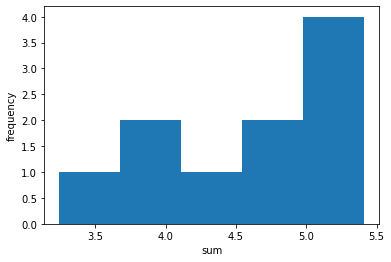

In [74]:
samples = {}

for i in range(10):
    values = np.random.rand(10)
    key = sum(values)
    samples[key] = values

sorted_samples = collections.OrderedDict(sorted(samples.items()))
print(list(sorted_samples.keys()))

num_bins = 5
n, bins, patches = plt.hist(samples.keys(), num_bins)
plt.xlabel('sum')
plt.ylabel('frequency')

3.1 Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.

In [168]:
k, n = 0, 4
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n): 
    if x[i] == 2:
        k = k + 1

#k_check = желаемый успех        
k_check = 2

c_kn = math.factorial(n) / (math.factorial(k_check) * math.factorial(n - k_check))
pnk_simple = c_kn * (1 / 2**n)
pnk_full = c_kn * (0.5**k_check)*(0.5**(n-k_check))
print(a, b, c, d)
print(x)
print(k, n, k/n, c_kn, pnk_simple, pnk_full)

[0 1 0 1] [0 0 1 0] [0 0 1 0] [1 0 1 0]
[1 1 3 1]
0 4 0.0 6.0 0.375 0.375


3.2 Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.


In [169]:
k, n = 0, 24
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
e = np.random.randint(0, 2, n)
f = np.random.randint(0, 2, n)

x = a + b + c + d + e + f
for i in range(0, n): 
    if x[i] == 2:
        k = k + 1

#k_check = желаемый успех        
k_check = 6

c_kn = math.factorial(n) / (math.factorial(k_check) * math.factorial(n - k_check))
pnk_full = c_kn * (0.5**k_check)*(0.5**(n-k_check))

print(k, n, k/n, pnk_full)

6 24 0.25 0.008022546768188477


4. Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [172]:
for p in itertools.permutations ('01234', 3):
    print(''.join(str(x) for x in p))

012
013
014
021
023
024
031
032
034
041
042
043
102
103
104
120
123
124
130
132
134
140
142
143
201
203
204
210
213
214
230
231
234
240
241
243
301
302
304
310
312
314
320
321
324
340
341
342
401
402
403
410
412
413
420
421
423
430
431
432


In [174]:
for c in itertools.combinations ('01234', 3):
    print(''.join(str(x) for x in c))

012
013
014
023
024
034
123
124
134
234


In [178]:
for l in itertools.product("01234",repeat=2):
    print(''.join(l))

00
01
02
03
04
10
11
12
13
14
20
21
22
23
24
30
31
32
33
34
40
41
42
43
44
